# Data Preprocessing

# Import neccesary libarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the DataSet

In [2]:
# Load the dataset
data = pd.read_csv('bank-full.csv' , sep=';')

In [3]:
# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Data Cleanning

## Sanity check data

In [5]:
# Check the shape of the data
# cloums and rows
data.shape

(45211, 17)

In [6]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default are ['no' 'yes']

Unique values in housing are ['yes' 'no']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['unknown' 'cellular' 'telephone']

Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Missing Value Treatment

In [9]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


Missing values treated.


In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate  value treatment

In [12]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


In [13]:
# Saving the cleanned data
data.to_csv('bank-full_tabled.csv', index=False)

# Exploratory Data Analysis (EDA)

In [14]:
# Summary statistics for Numeric features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [15]:
# Summary statistics for categorical features
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


## Vizualization for all the numerical columns

In [16]:
# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

### Distribution Histogram

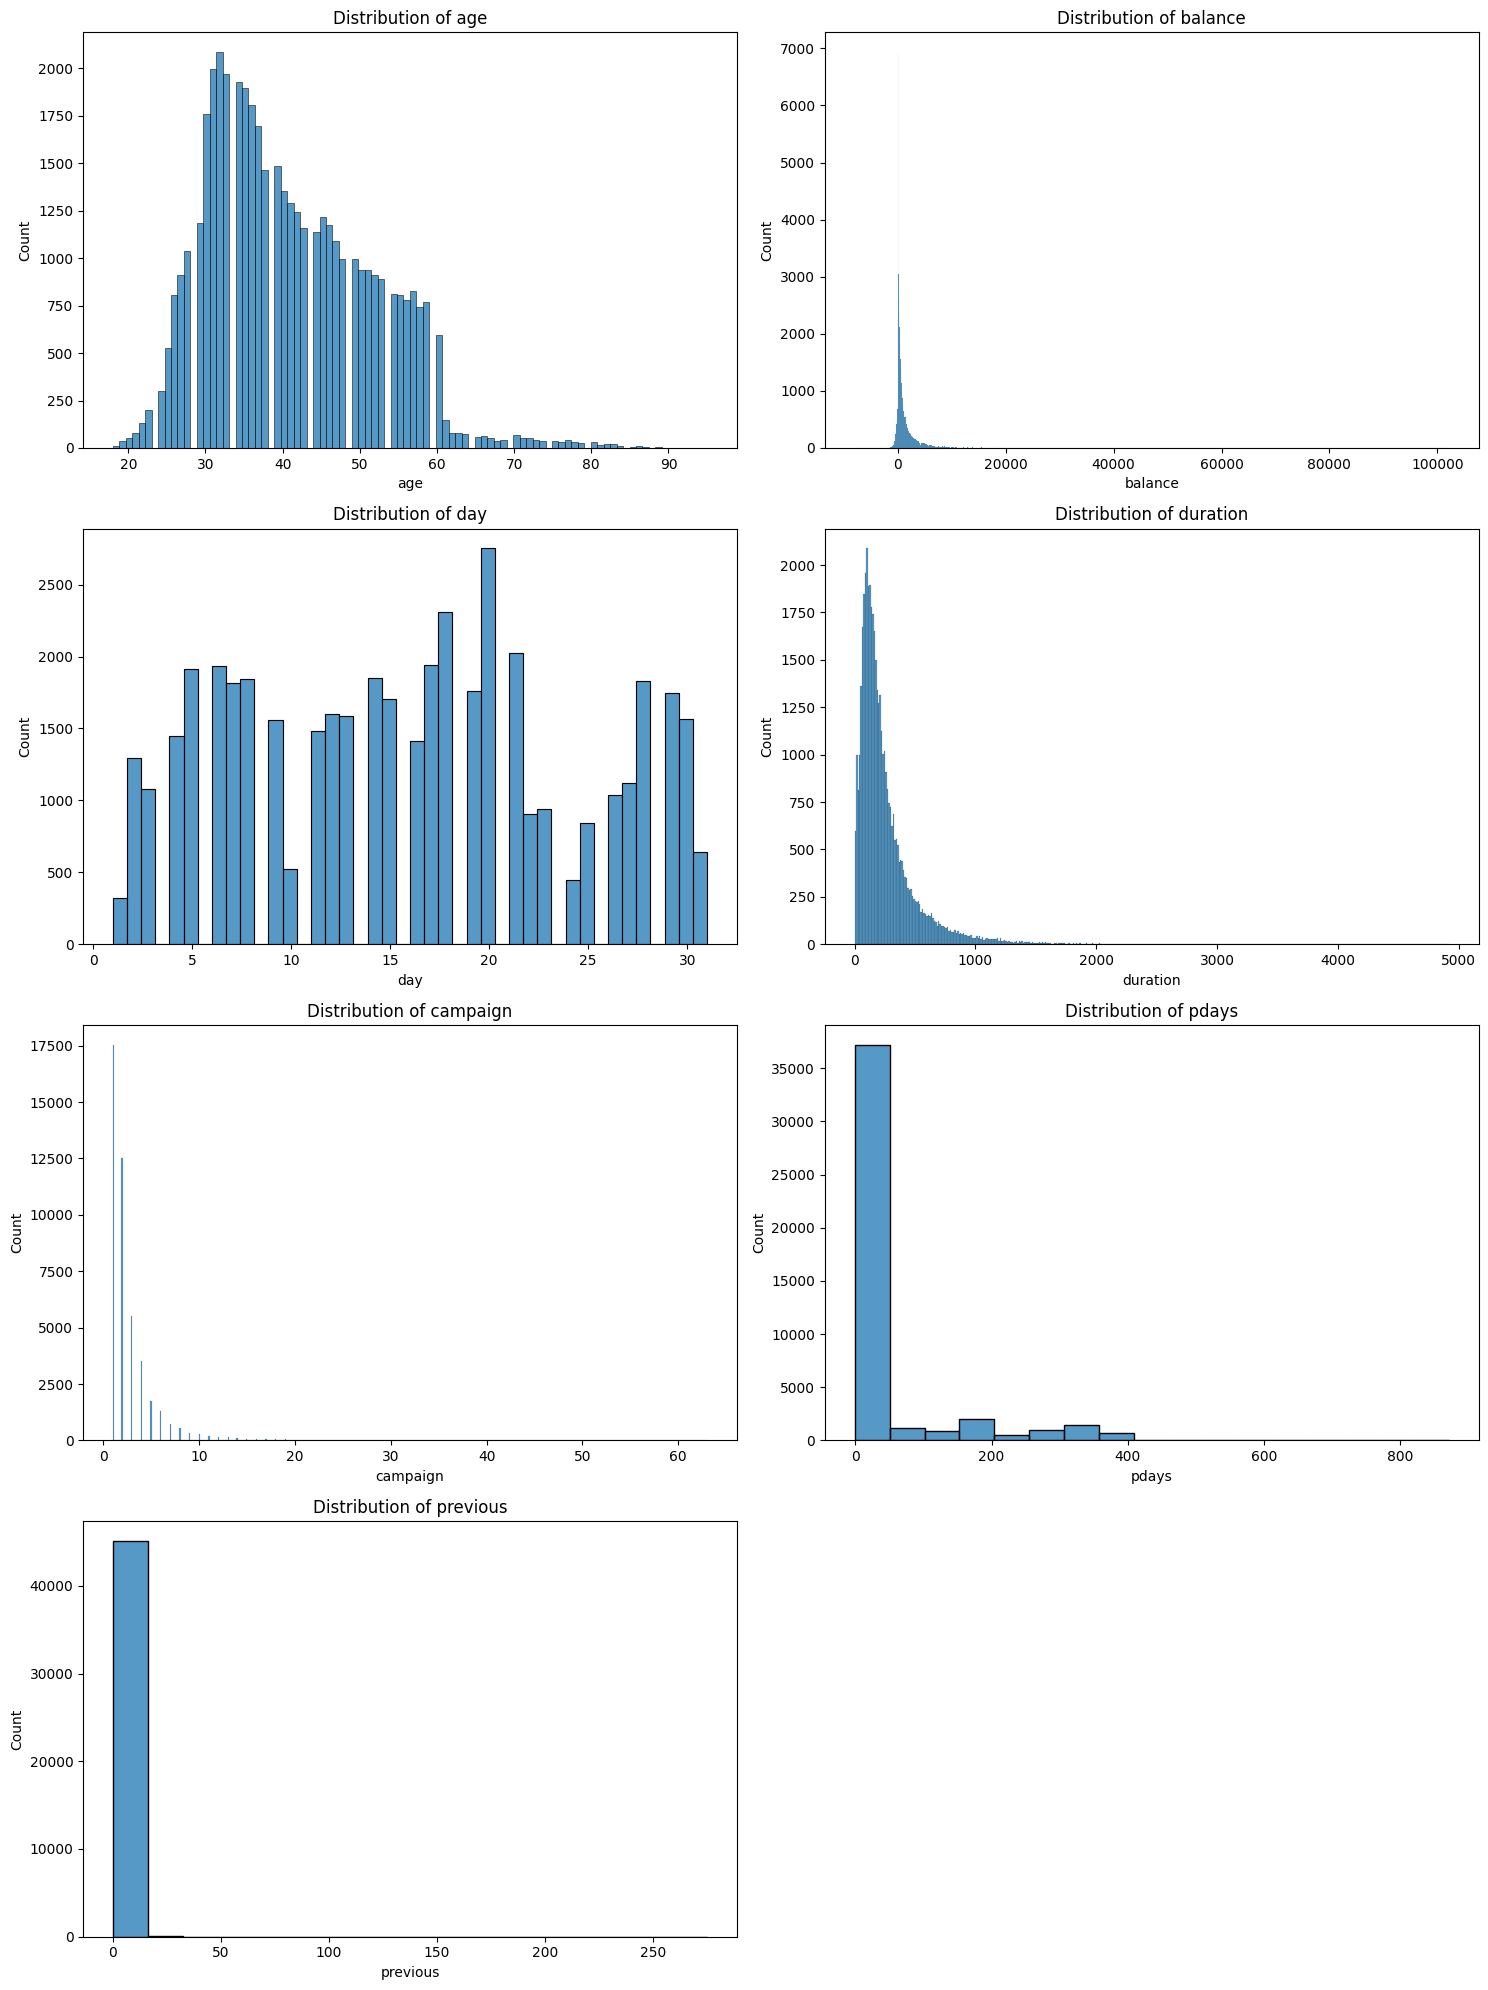

In [17]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Distribution using Boxplot

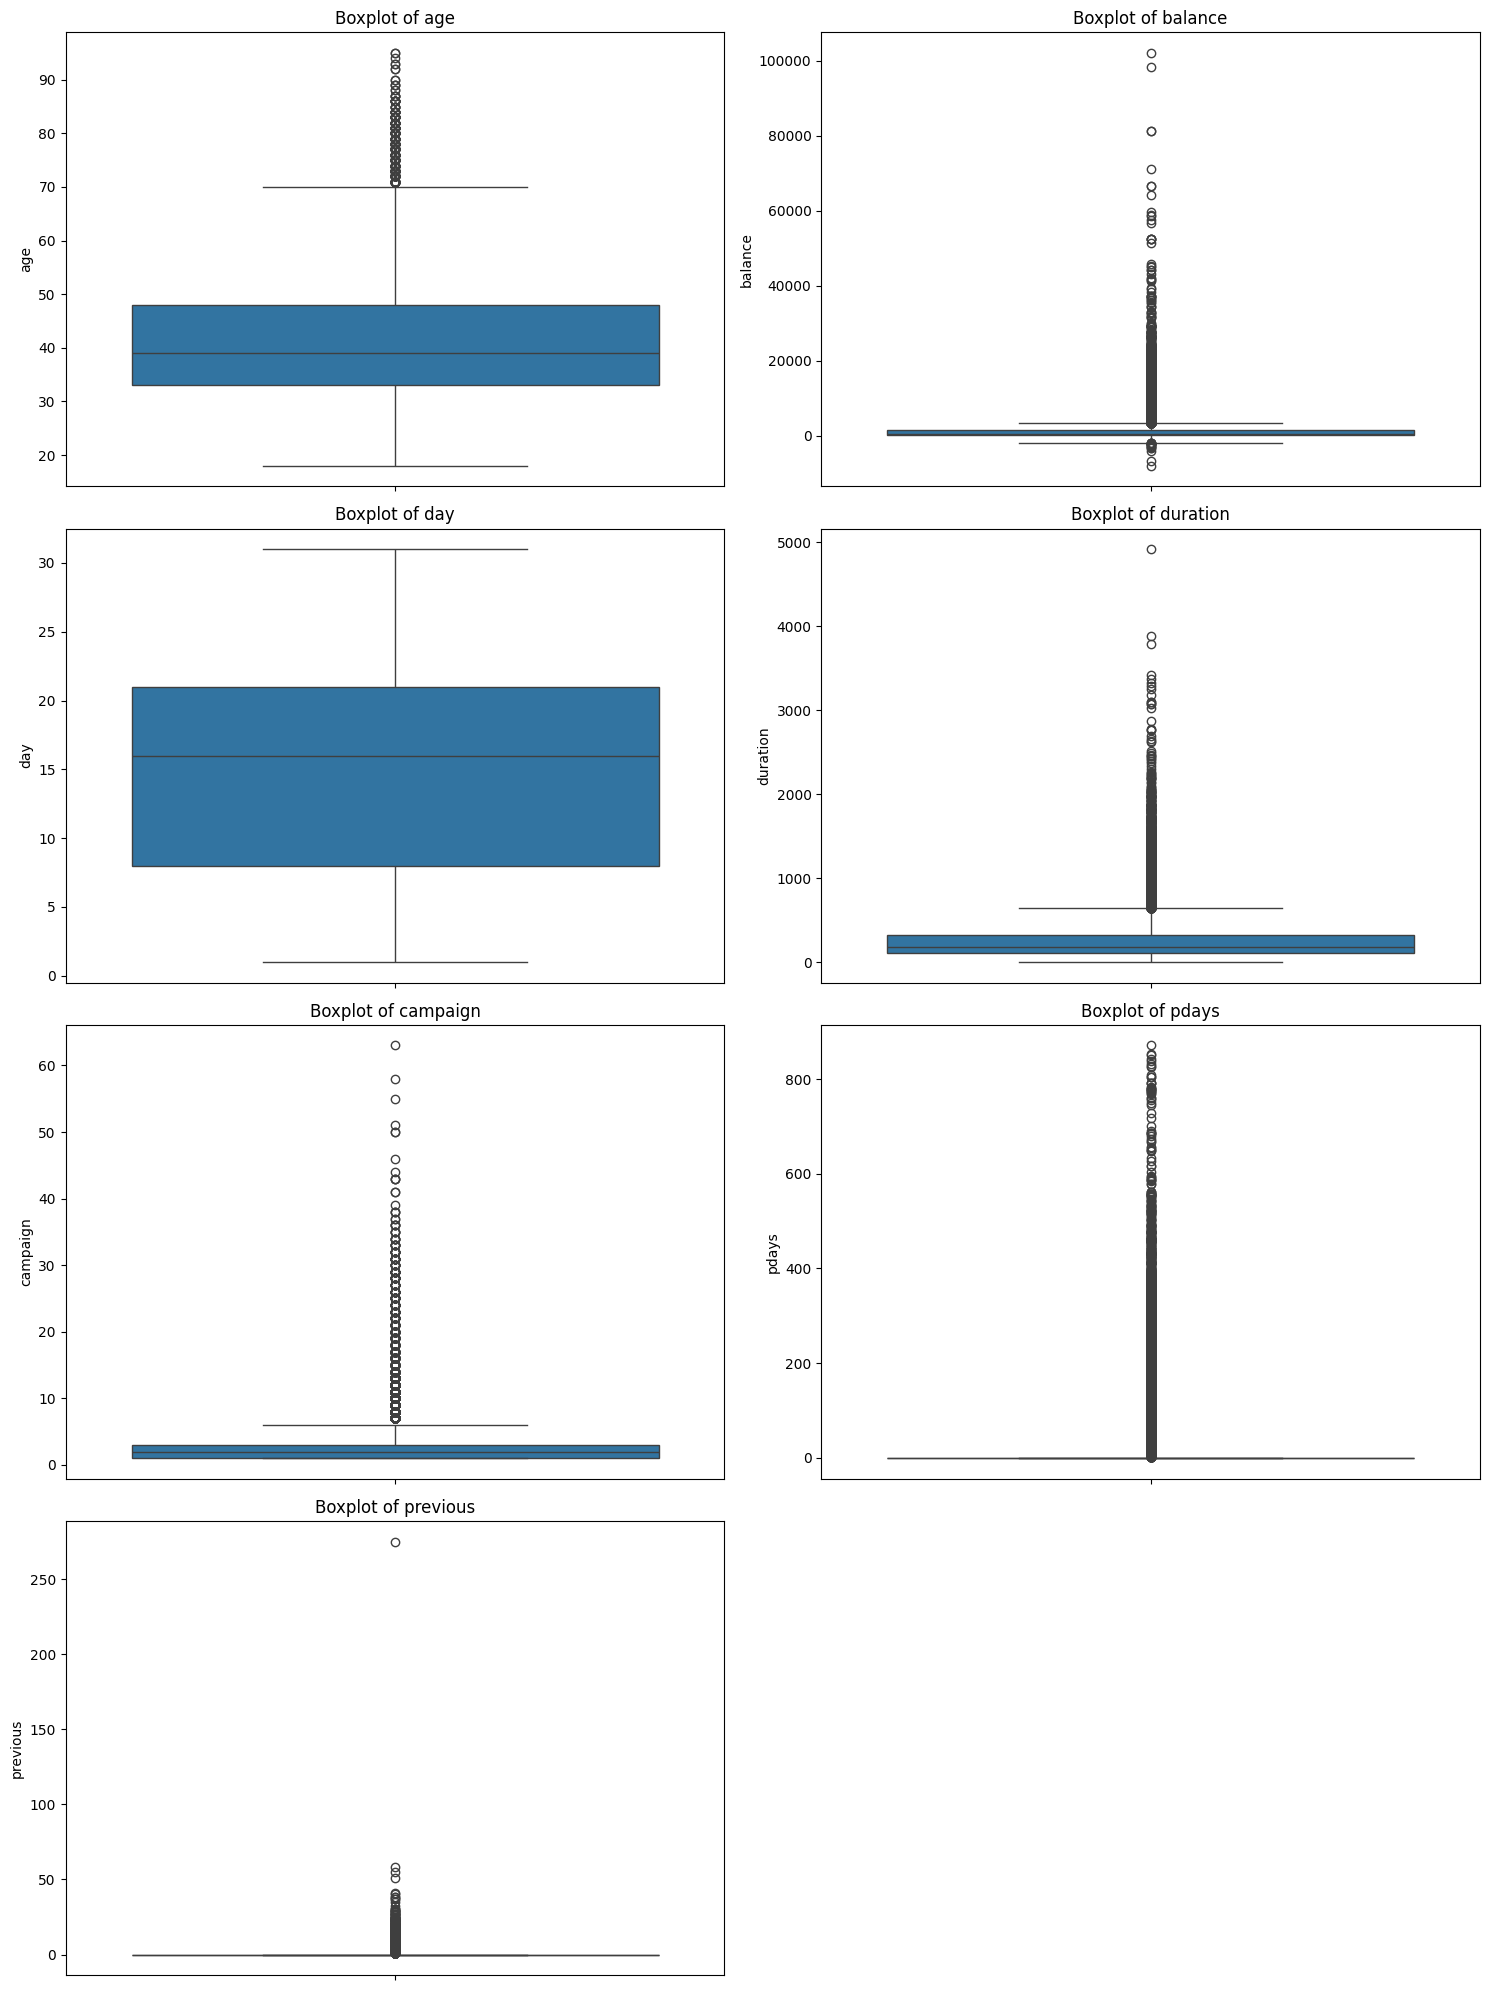

In [18]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Bivariate Analysis

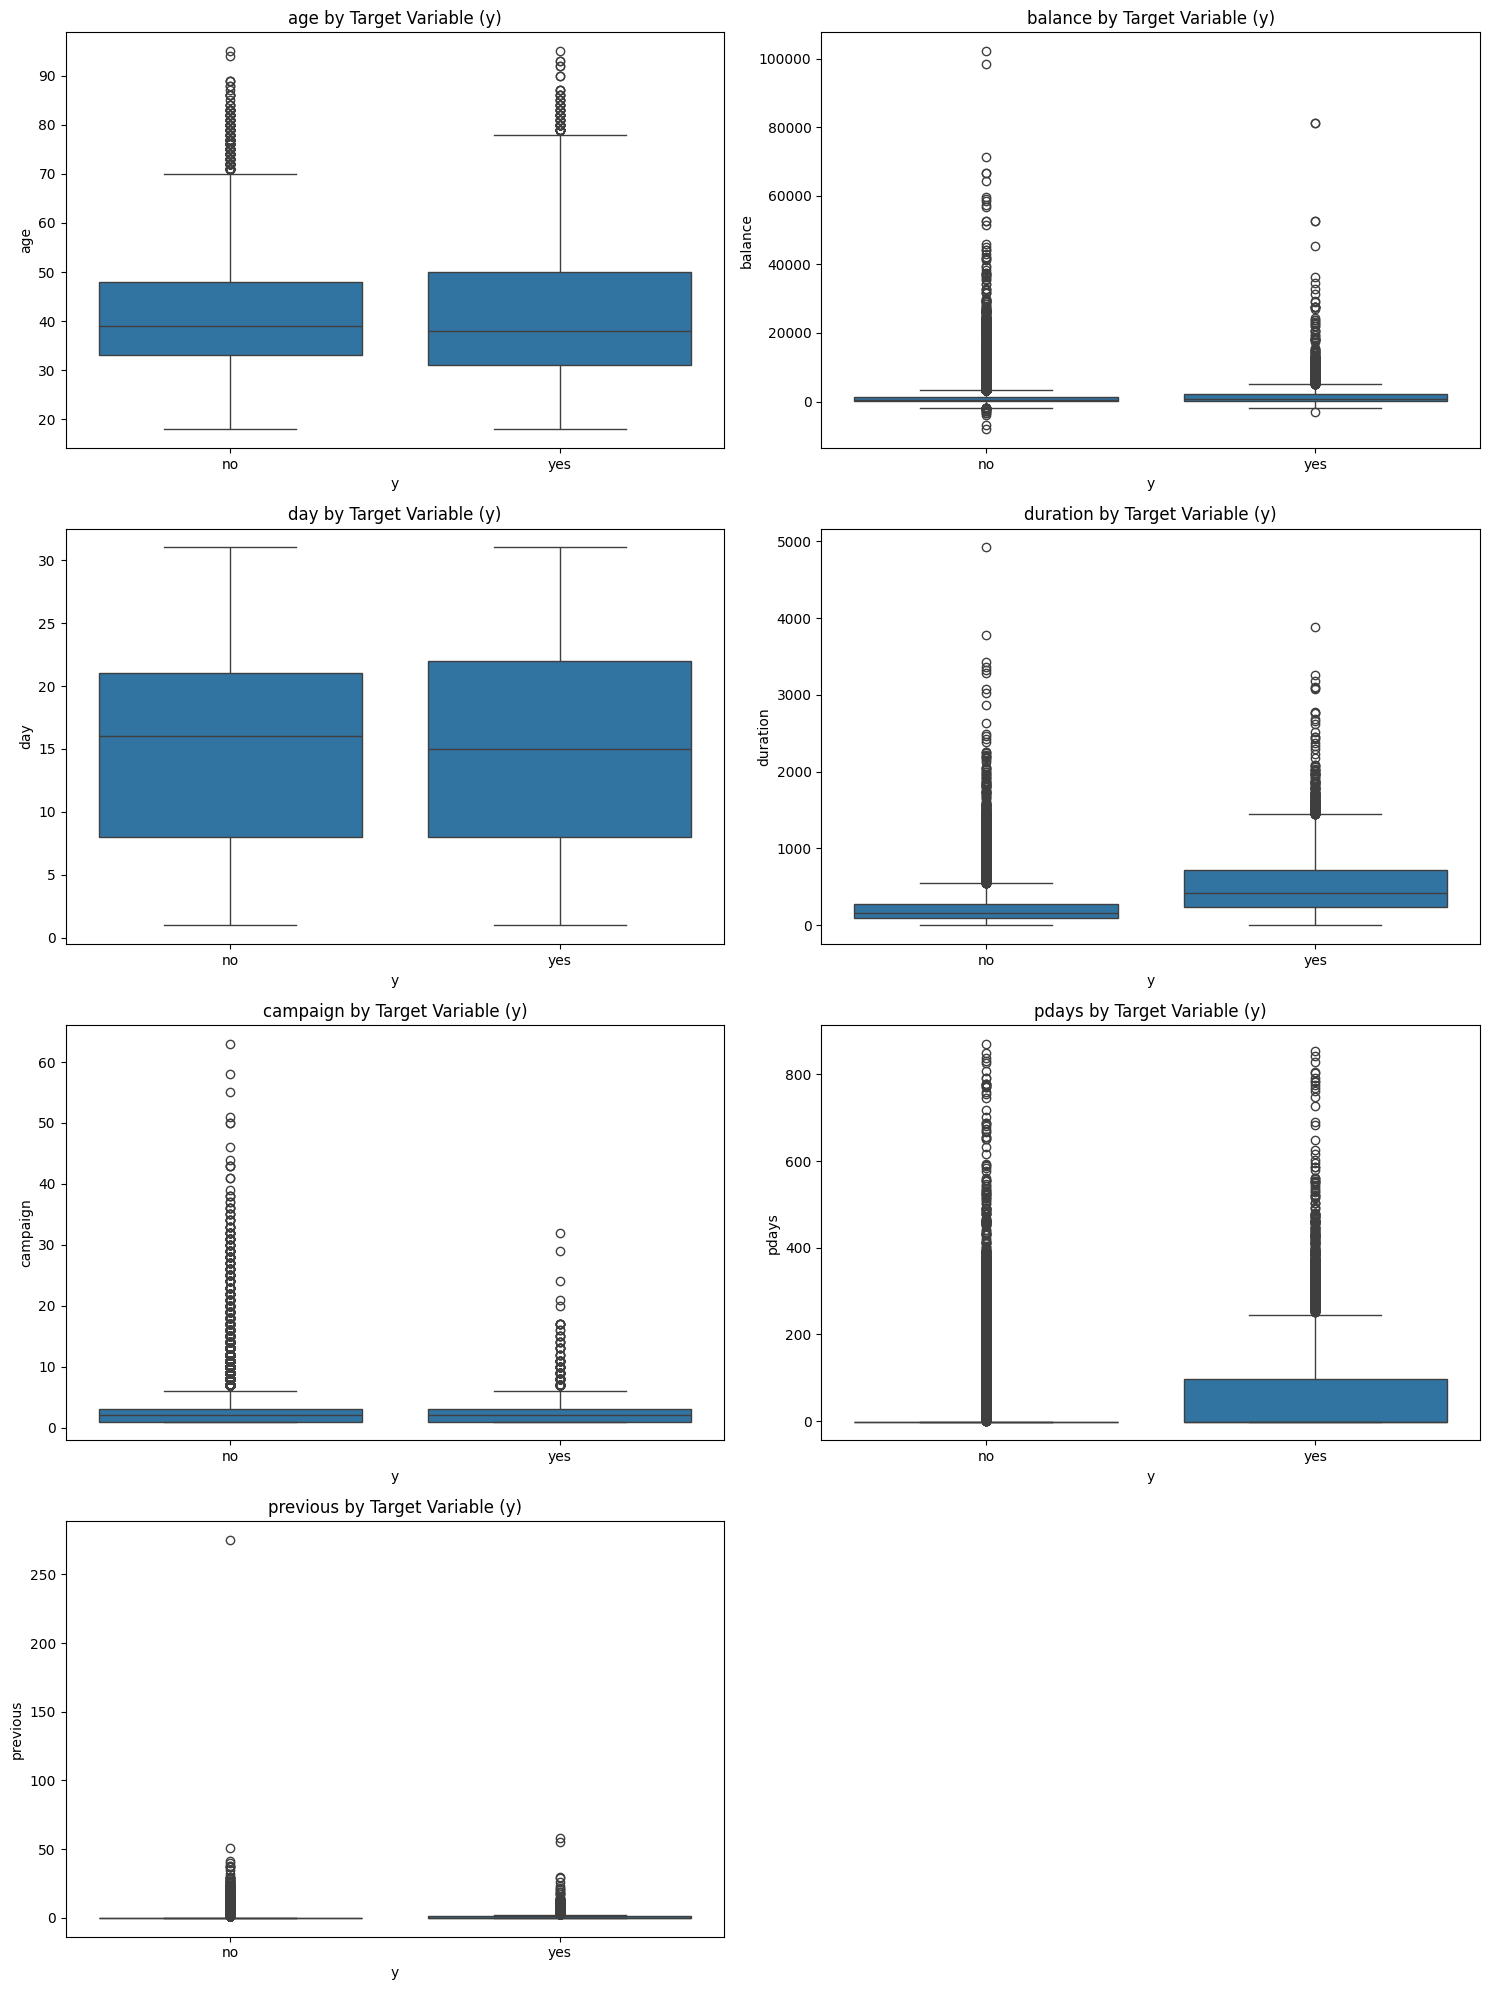

In [19]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='y', y=col, data=data, ax=axes[i])
    axes[i].set_title(f"{col} by Target Variable (y)")

    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
# Show the figure for numerical columns
plt.tight_layout()
plt.show()


## Vizualization for all the categorical columns

In [20]:
# Define the categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

### Countplot

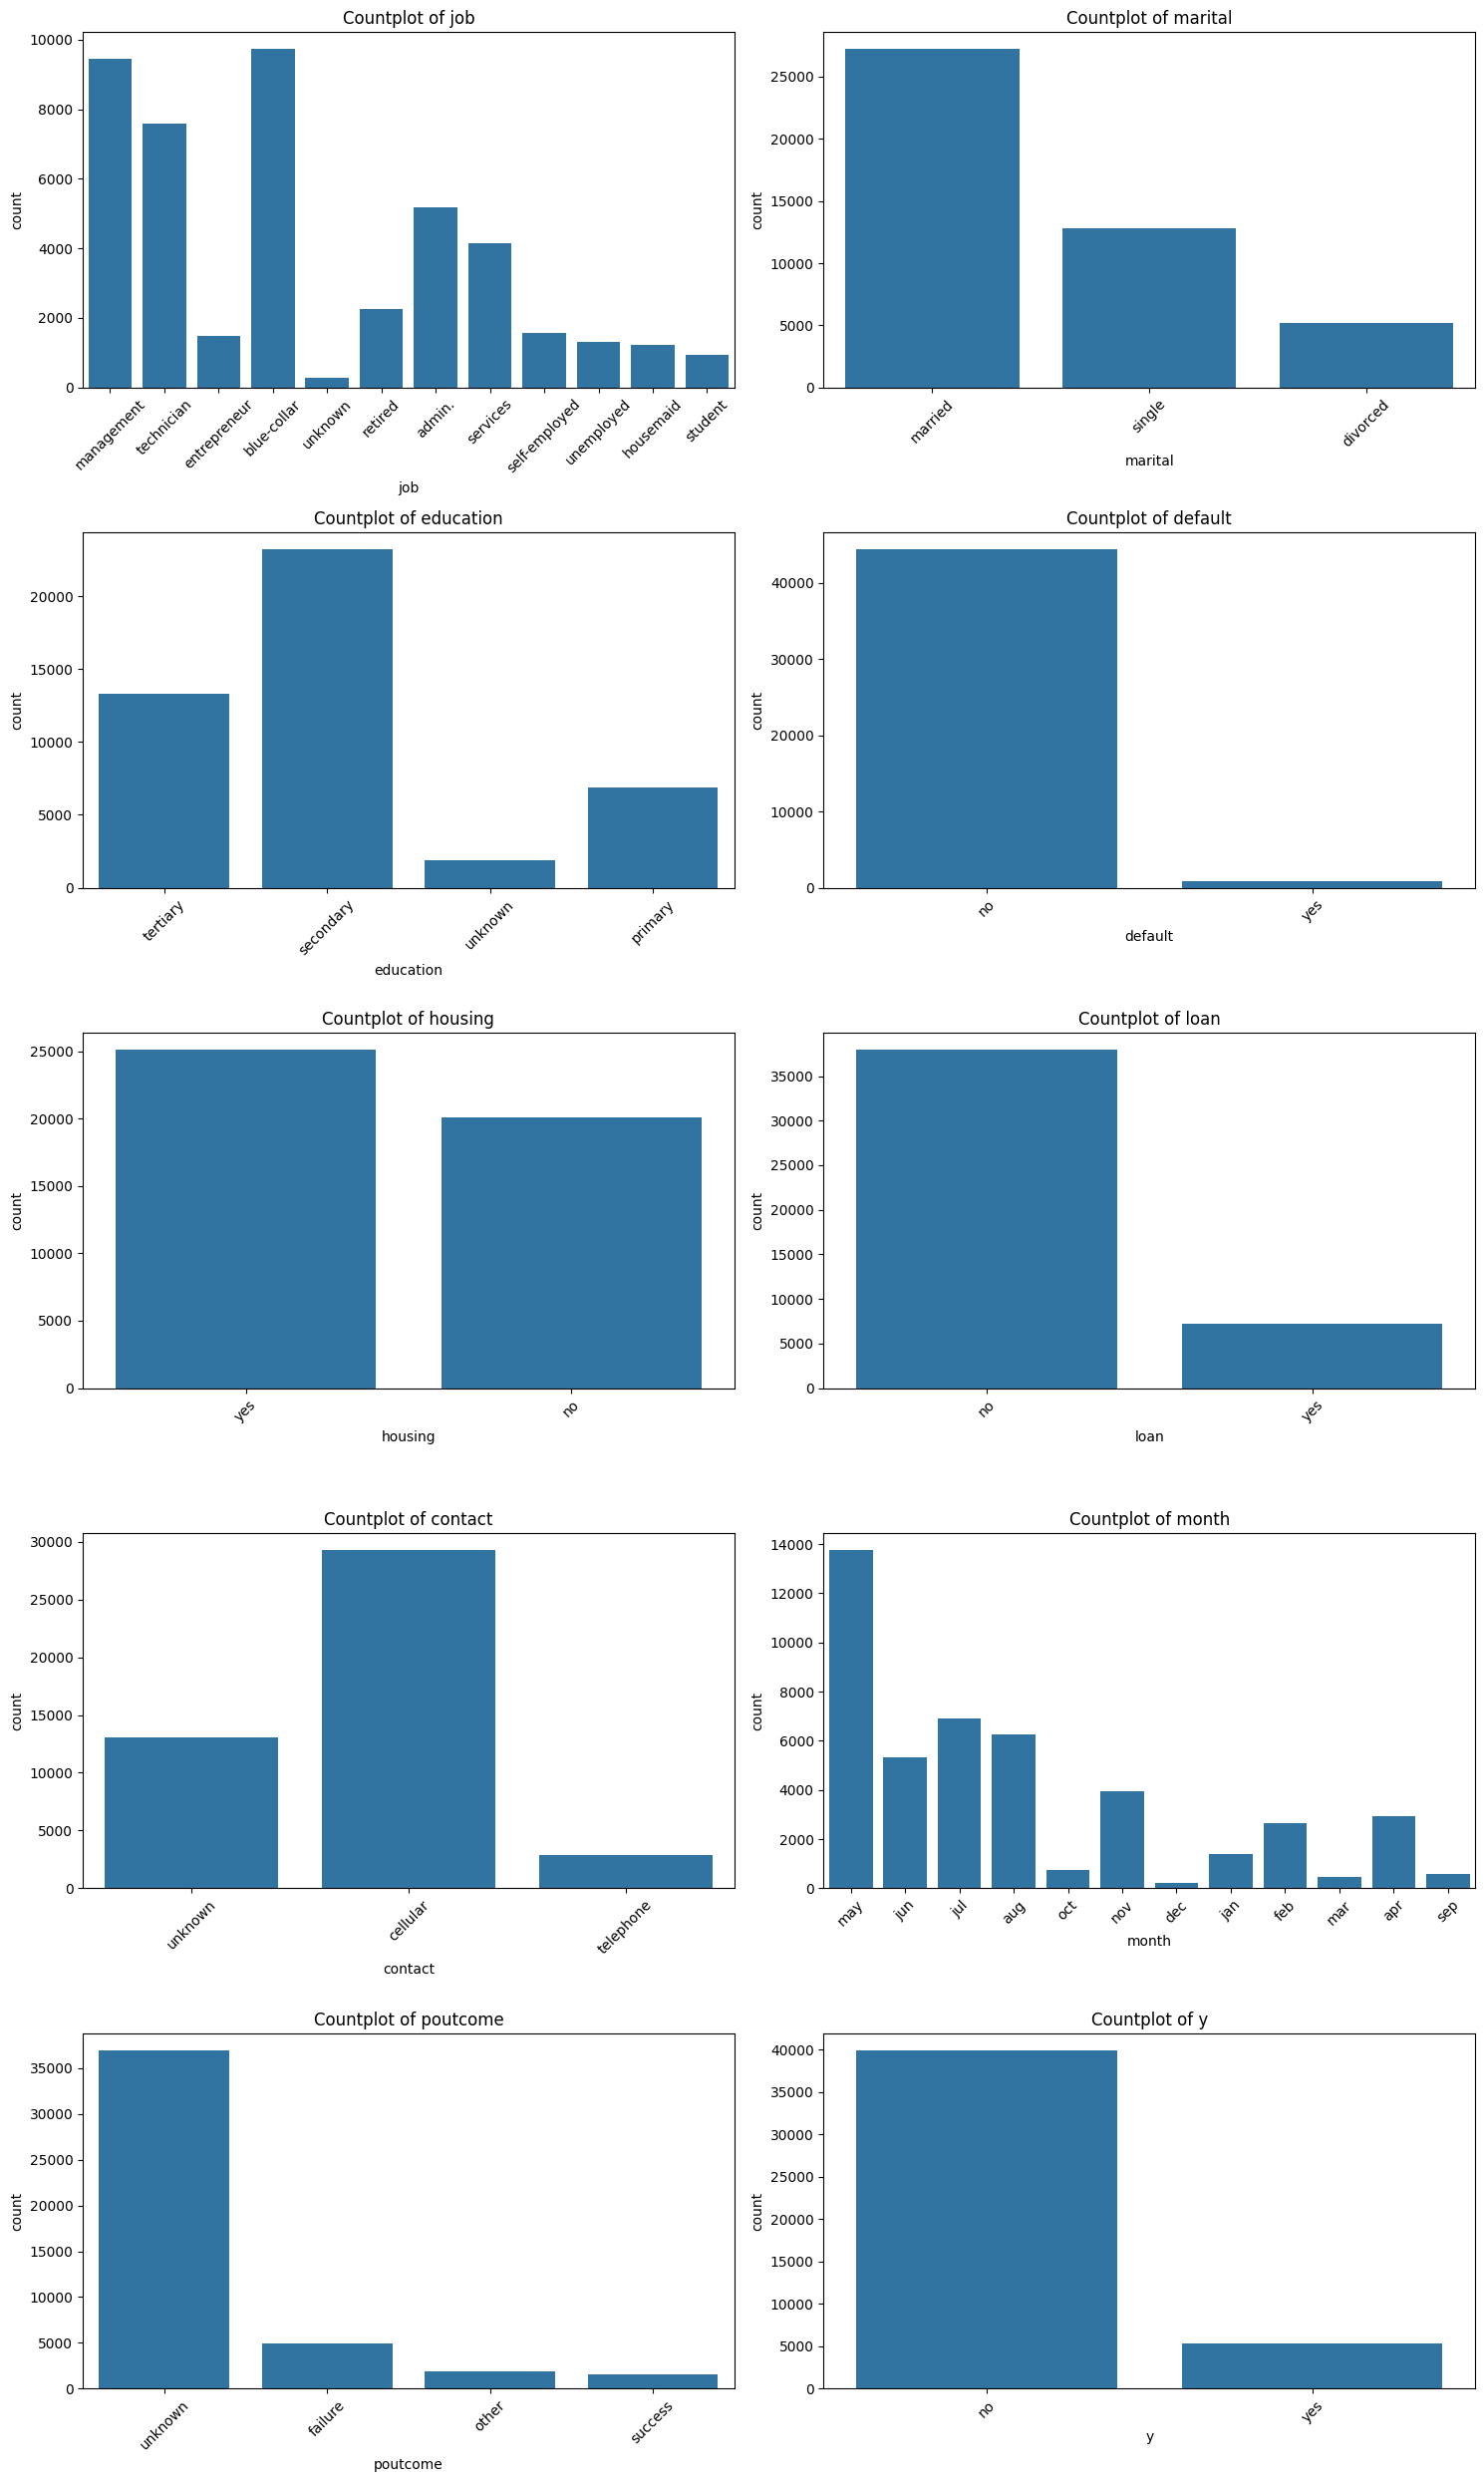

In [21]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) 

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each barplot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i]) 
    axes[i].set_title(f"Countplot of {col}")
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Target Variable Analysis

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


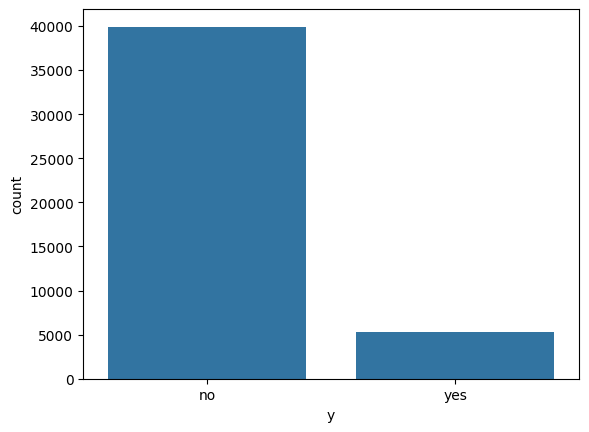

In [22]:
print(data['y'].value_counts(normalize=True))
sns.countplot(x='y', data=data)
plt.show()

### Bivariate Analysis

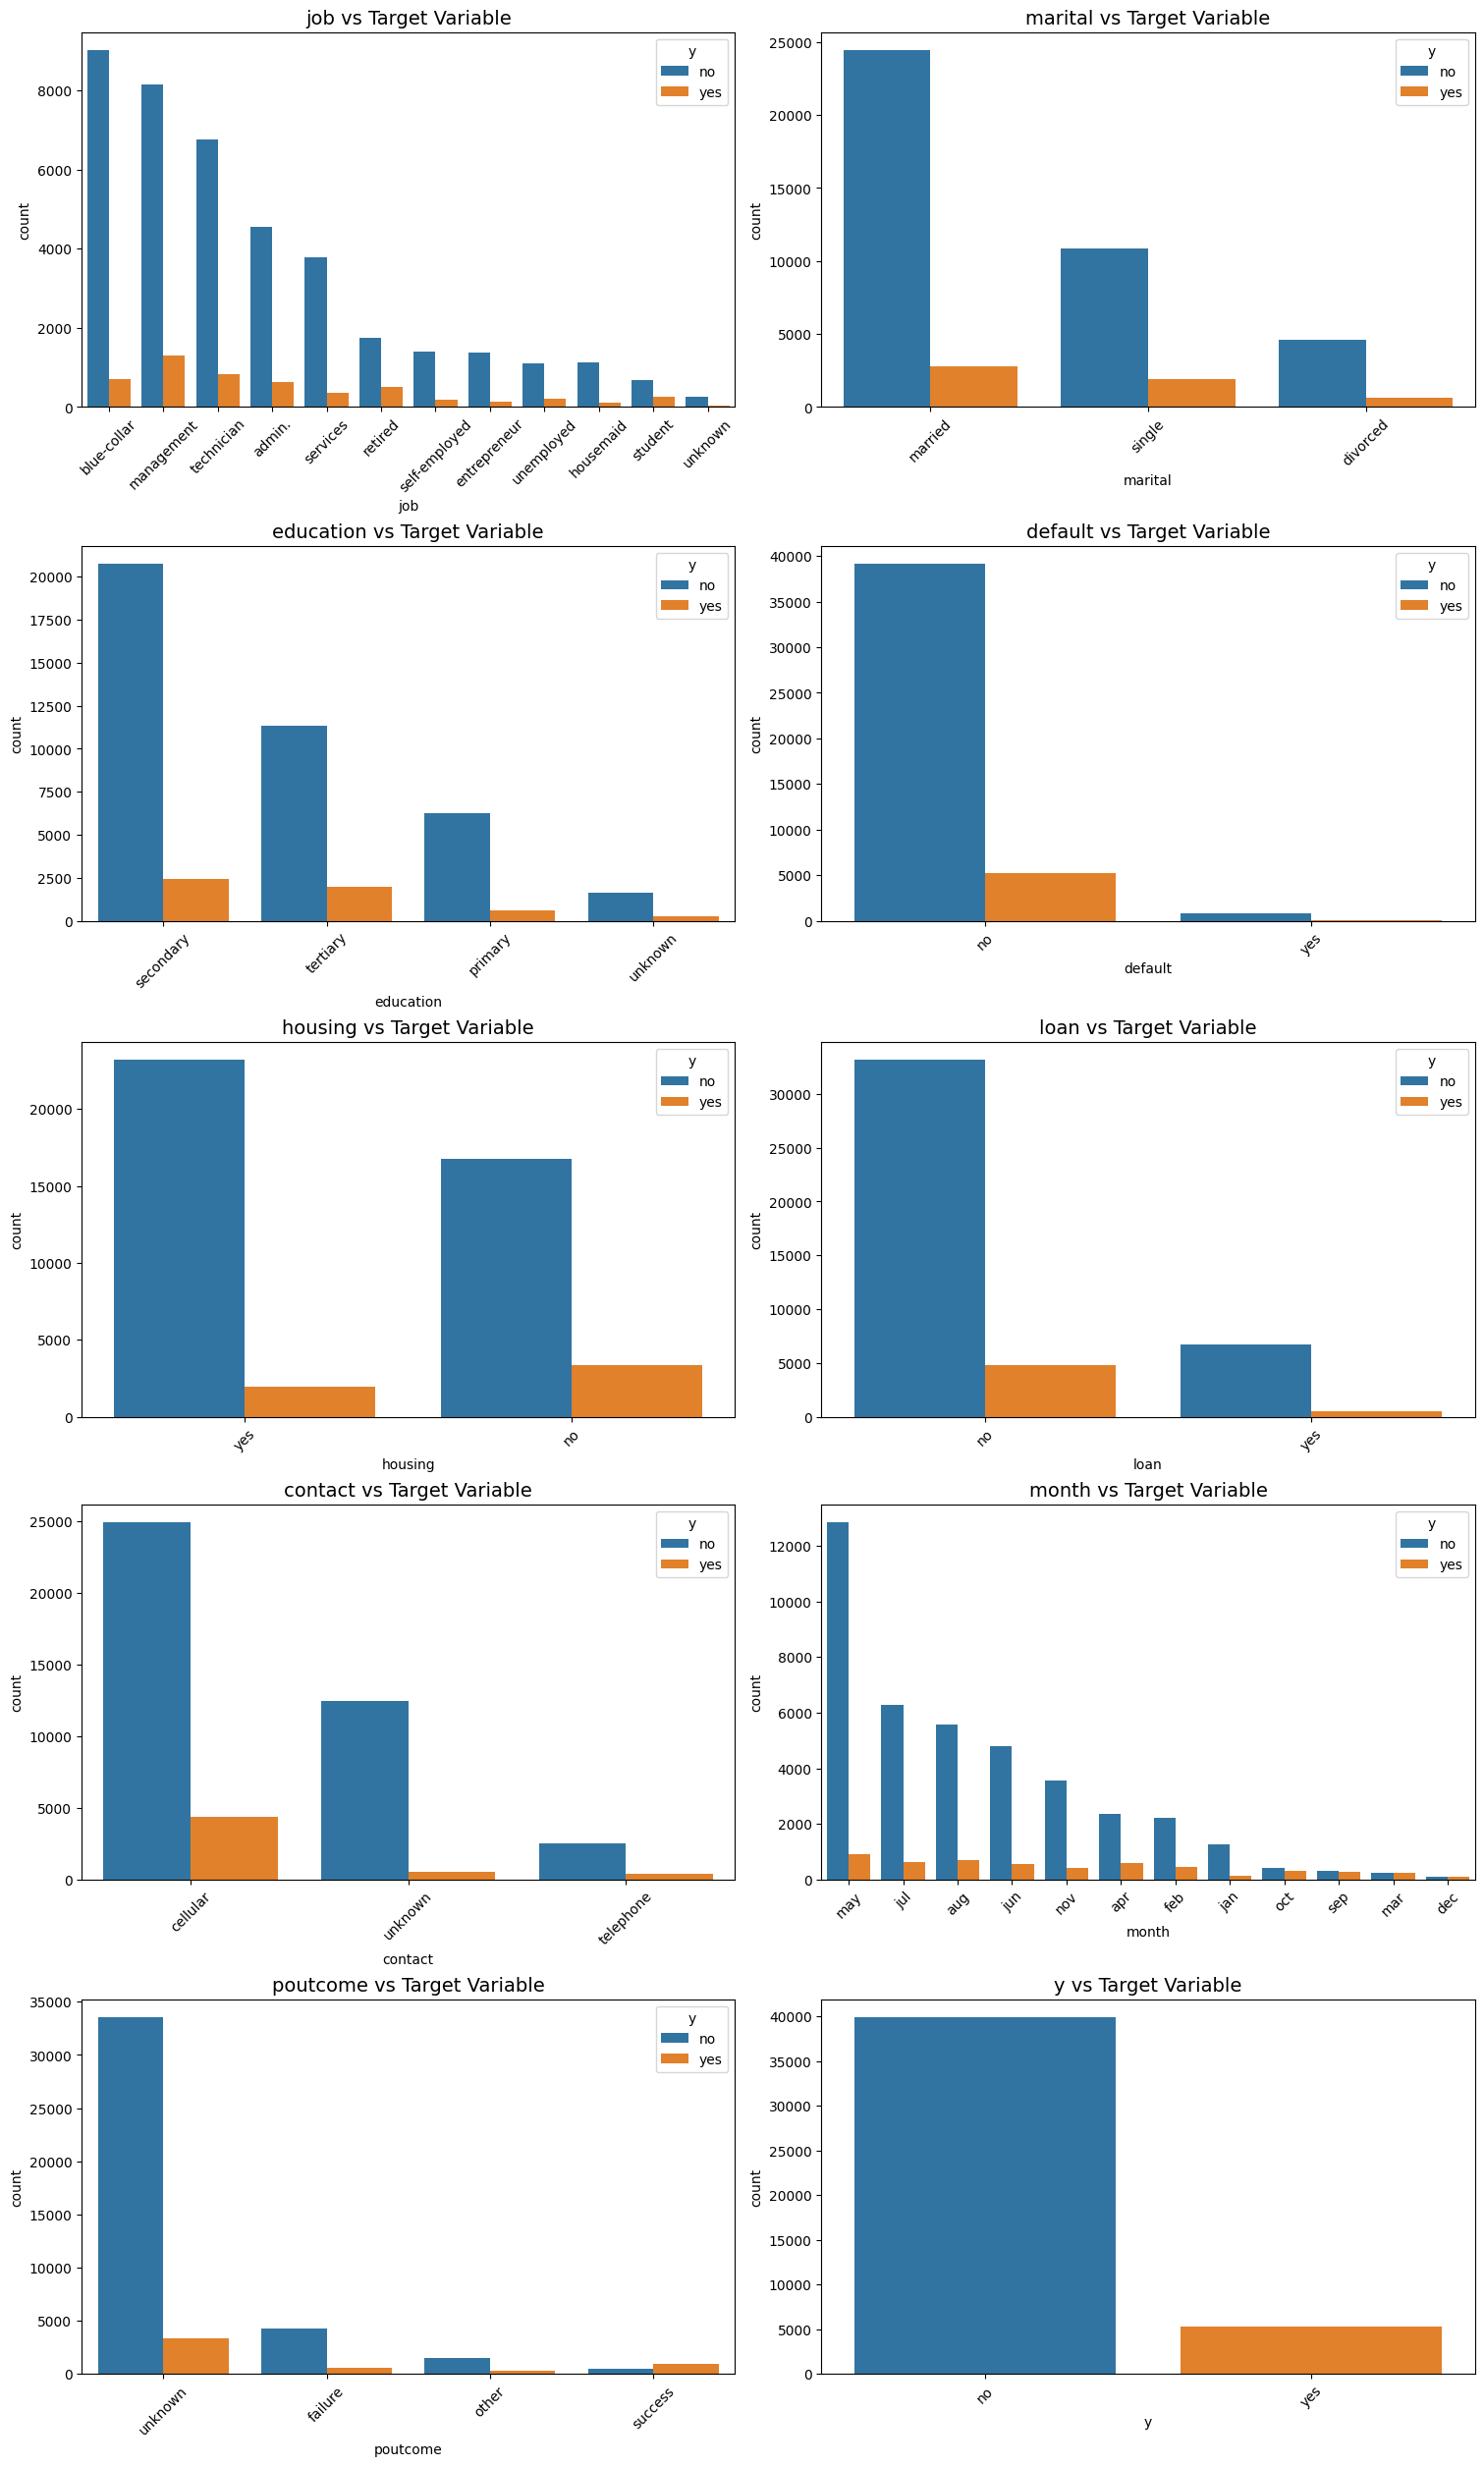

In [23]:
# Plot for Categorical Columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)  # Adjusted figsize

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='y', data=data, order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} vs Target Variable", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Show the figure for categorical columns
plt.show()

# Outlier Treatment

In [24]:
# Remove One Extereme values form previous column
data = data[data['previous'] != 275]

# Verify the rows have been dropped
print(f"Number of rows after dropping: {data.shape[0]}")

Number of rows after dropping: 45210


### Checking the outlayers using boxplot

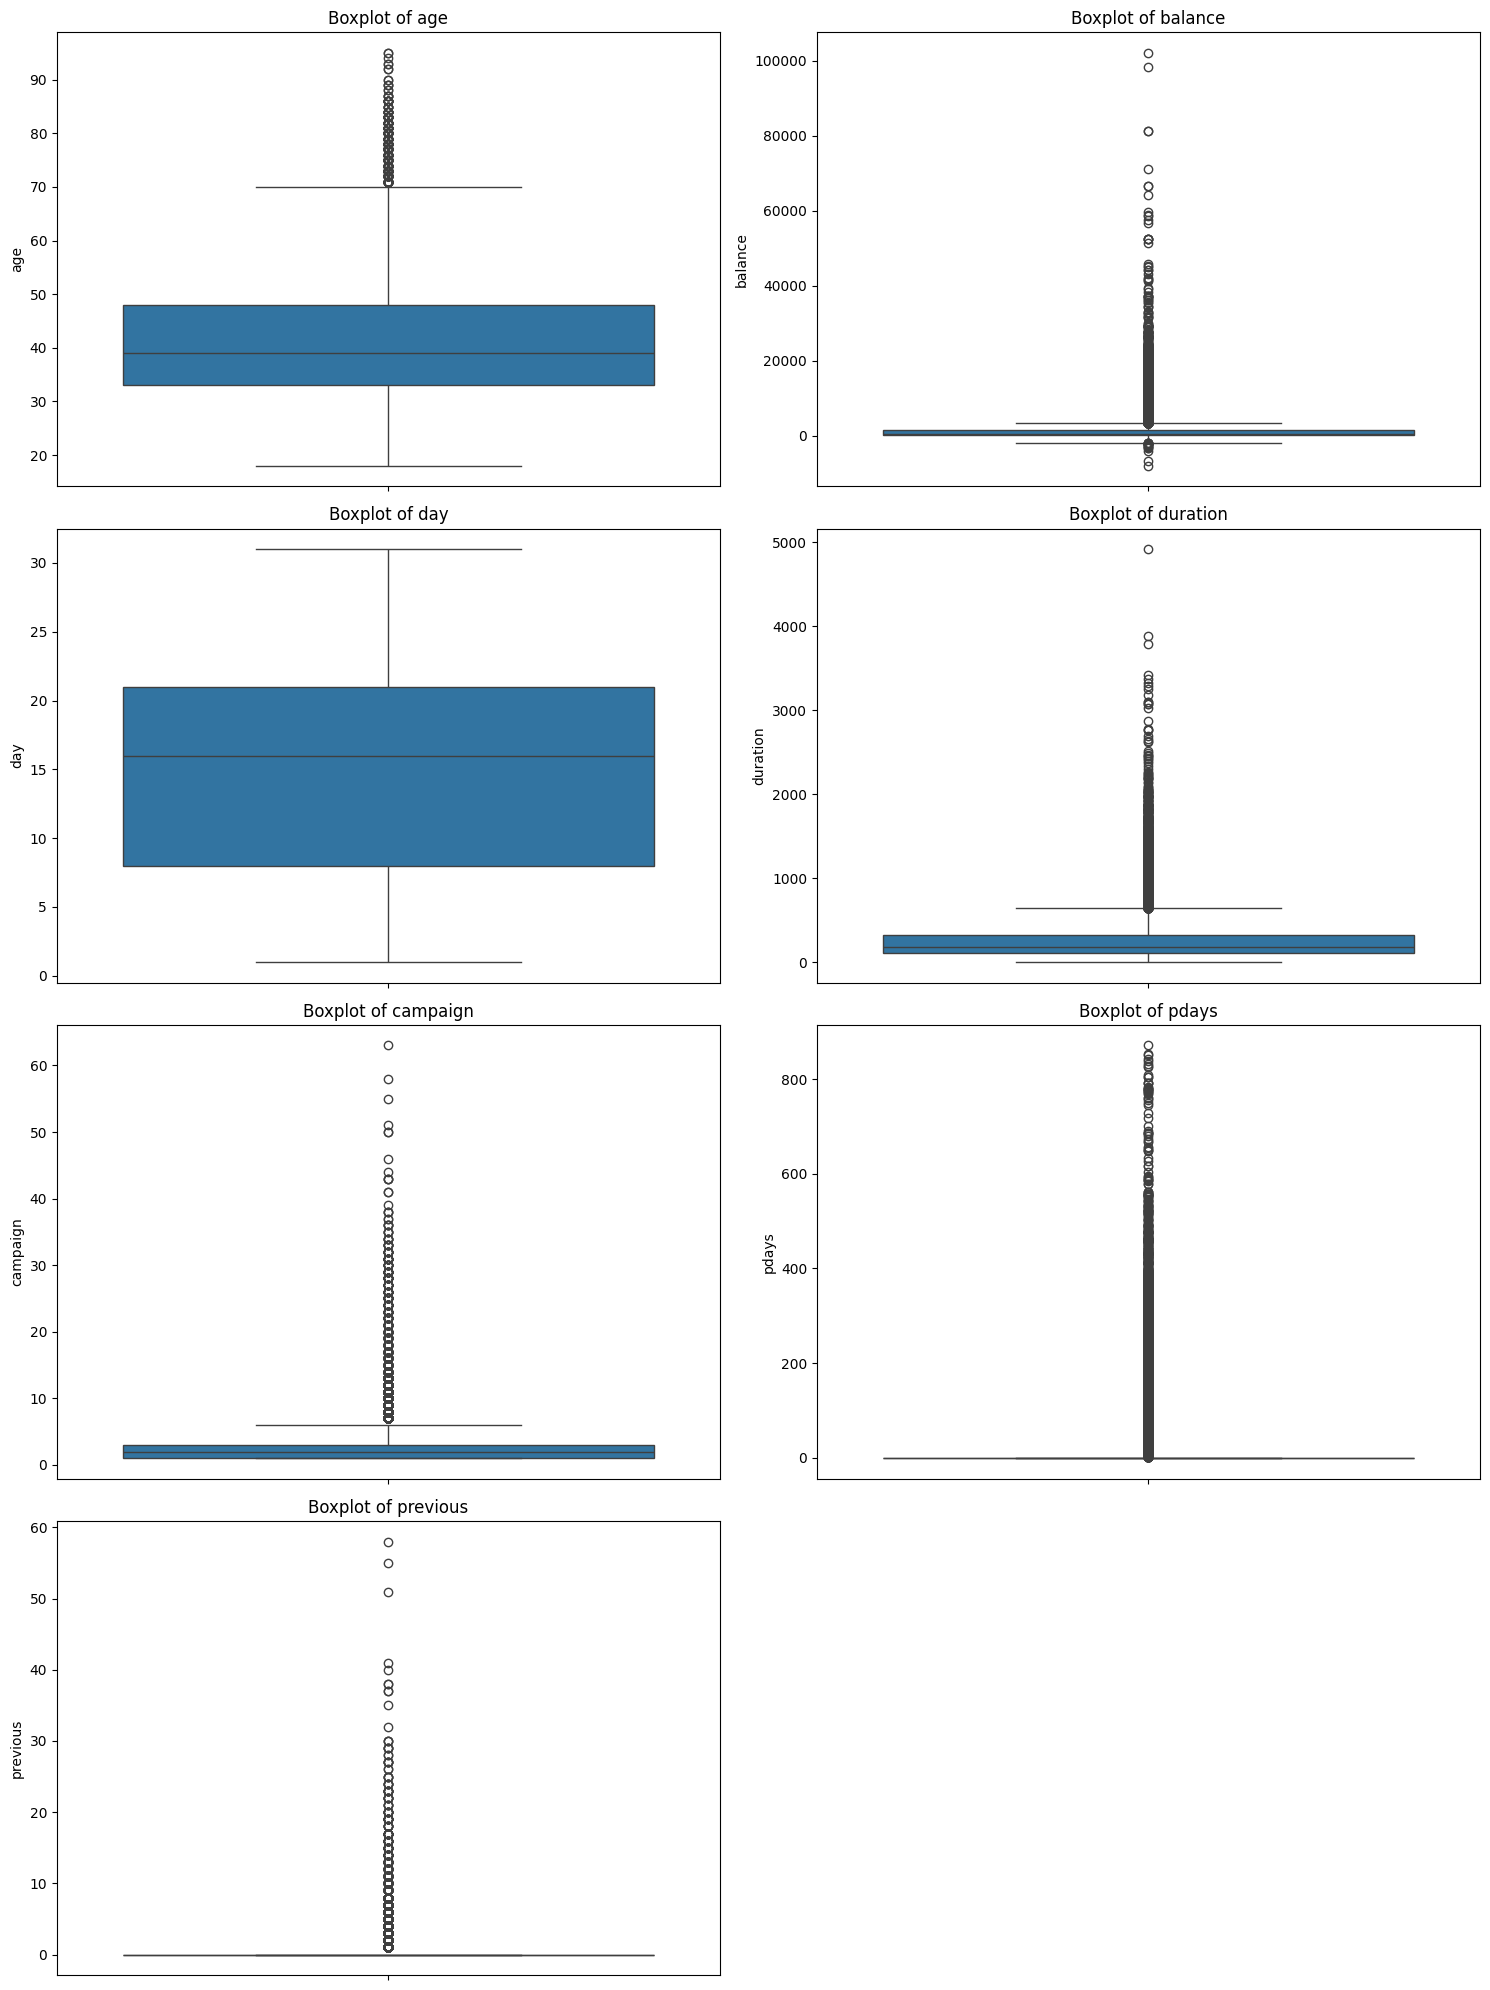

In [25]:
# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Handling the outlayers

In [26]:
# Cap 'campaign' at 99th percentile
cap_campaign = data['campaign'].quantile(0.99)
data['campaign'] = data['campaign'].clip(upper=cap_campaign)

In [27]:
# Cap 'previous' at 99th percentile
cap_previous = data['previous'].quantile(0.99)
data['previous'] = data['previous'].clip(upper=cap_previous)

### Again Checking the outlayers using boxplot

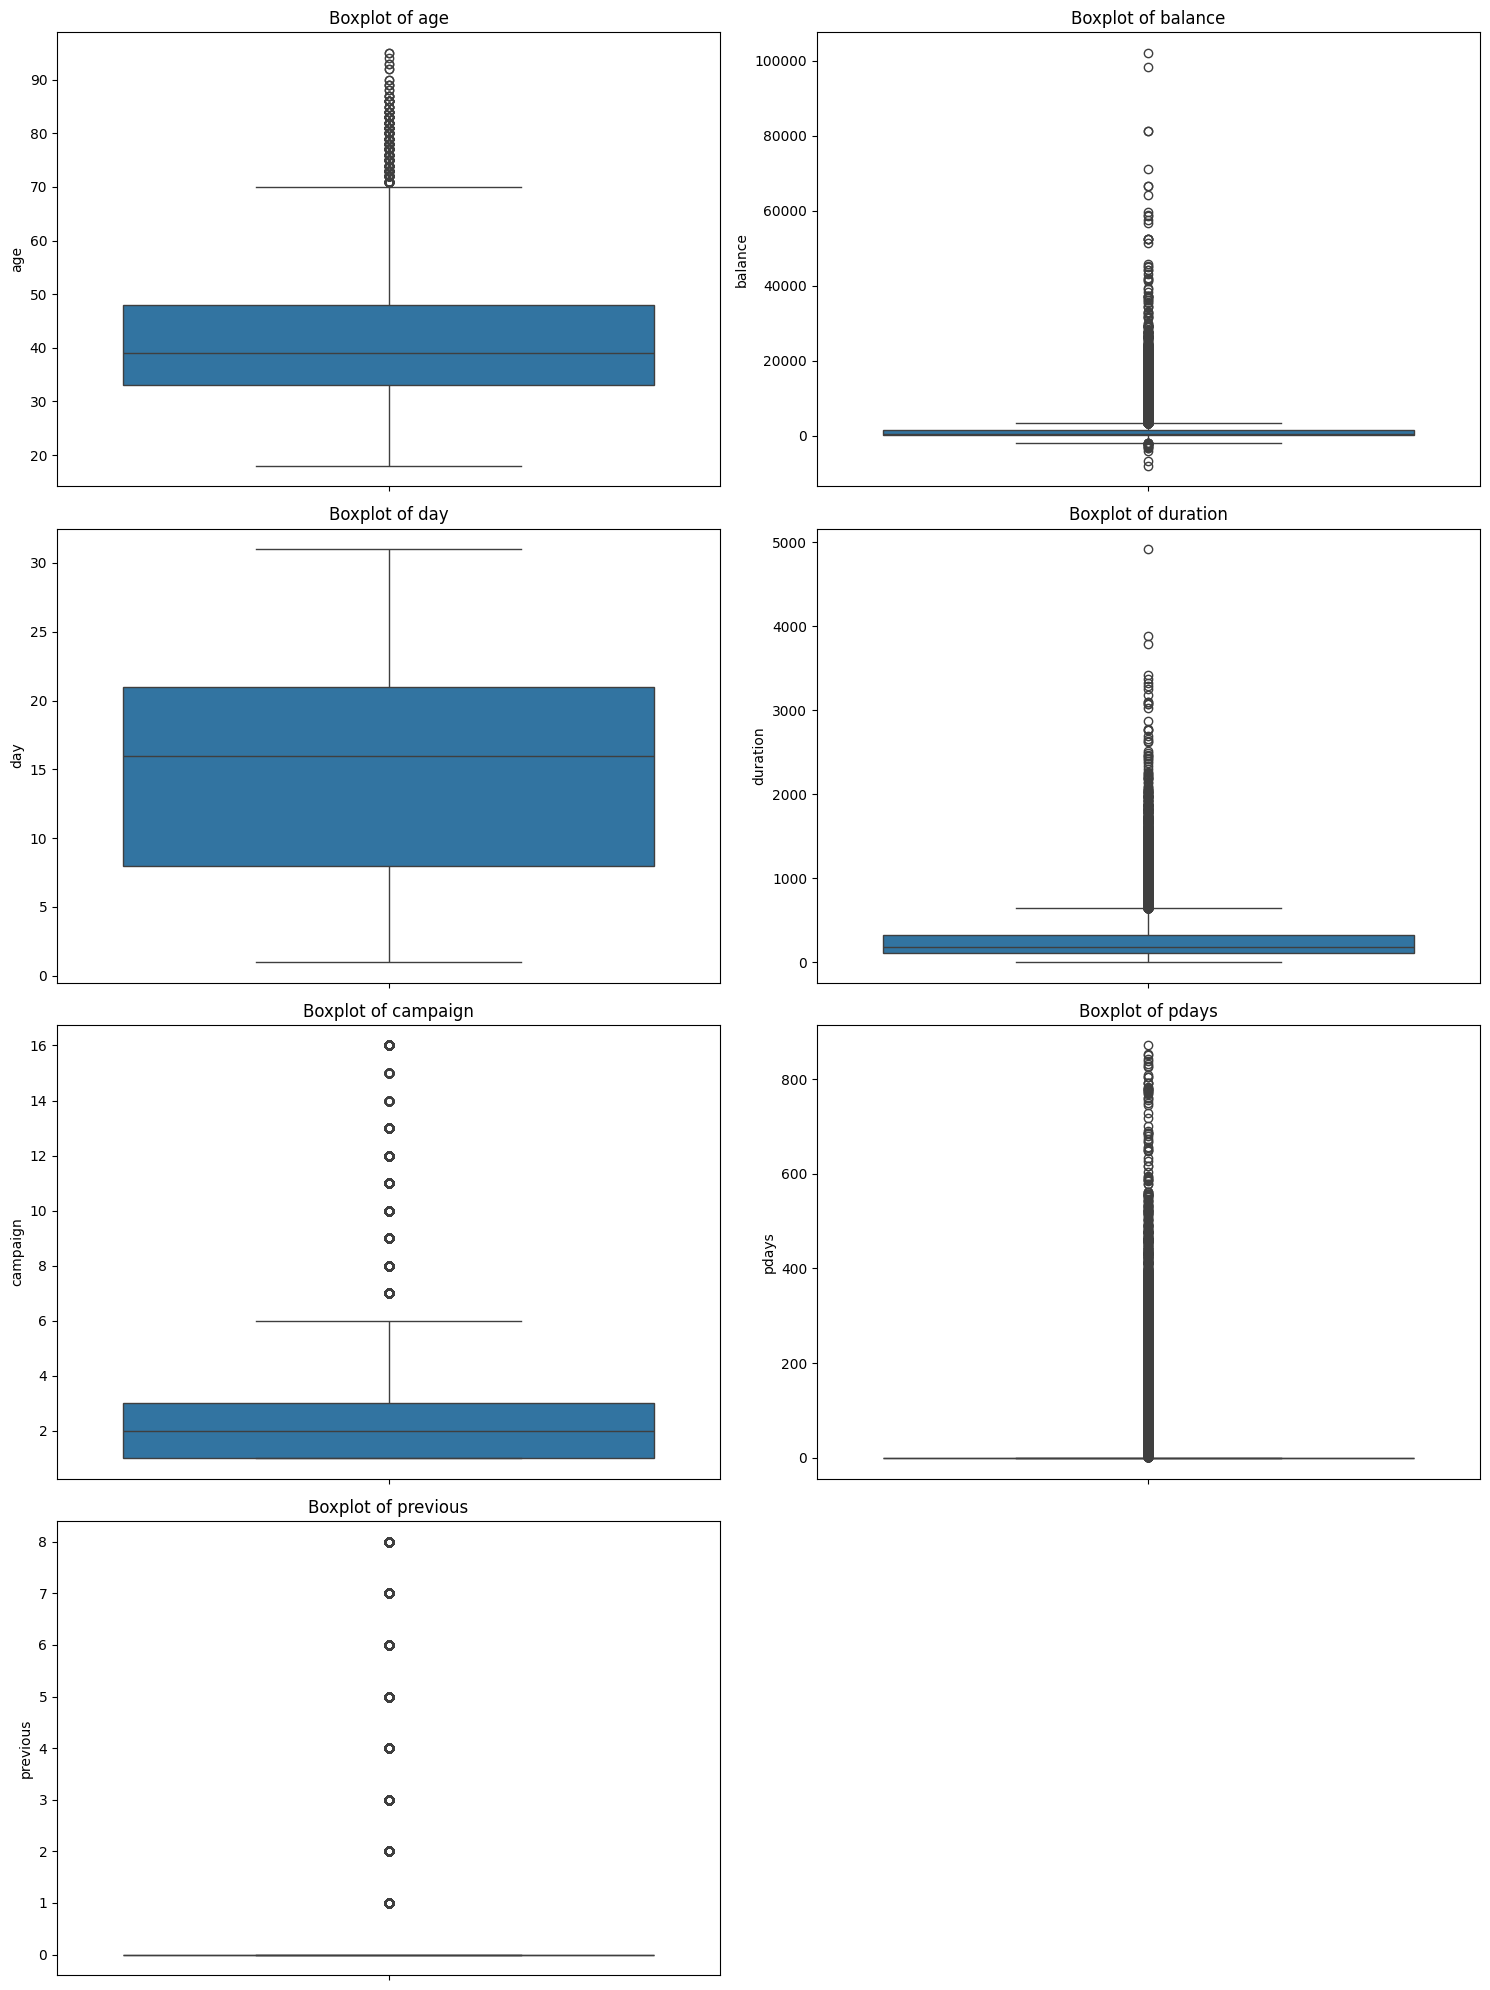

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_cols = 2  # Number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size for better visibility

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])  # Use 'y' for vertical boxplots
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Feature Engineering

## Feature transformation

##### new changed pdays

In [29]:
# Defineing the bins and labels for 'pdays' based on the distribution of values 
bins = [-1, 0, 10, 30, 60, 100, 200, float('inf')]  
labels = ['Not Contacted', '0-10 days', '11-30 days', '31-60 days', '61-100 days', '101-200 days', '200+ days']

# Replace -1 with 'Not Contacted' for easy handling and then bin the pdays values
data['pdays_binned'] = pd.cut(data['pdays'], bins=bins, labels=labels, right=False)

# Now, let's inspect the results
print(data[['pdays', 'pdays_binned']].head())

   pdays   pdays_binned
0     -1  Not Contacted
1     -1  Not Contacted
2     -1  Not Contacted
3     -1  Not Contacted
4     -1  Not Contacted


In [30]:
# Create an interaction feature for high balance and no previous contact
data['balance_no_previous'] = data['balance'] * (data['previous'] == 0)

## Feature selecting

In [31]:
# Encoding target variable 'y' from 'yes'/'no' to 1/0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Check the first few rows to confirm encoding
print(data['y'].head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [32]:
data.to_csv('ycheck.csv', index=False)

### correlation

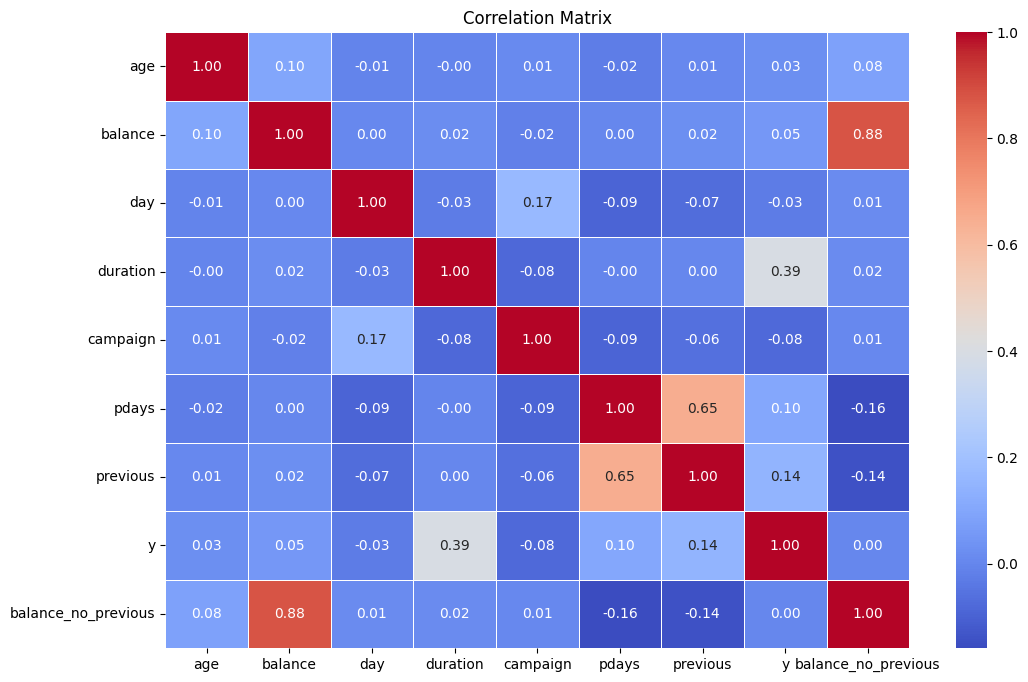

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [34]:

correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)

In [35]:
print("Correlation with y:")
print(correlation_with_y)

Correlation with y:
y                      1.000000
duration               0.394525
previous               0.144707
pdays                  0.103645
balance                0.052836
age                    0.025154
balance_no_previous    0.001377
day                   -0.028362
campaign              -0.078858
Name: y, dtype: float64


#### Drop unnecessary features

In [36]:
# Drop 'duration' feature to avoid leakage
data = data.drop(['duration'], axis=1)

In [37]:
# Drop the original 'pdays' feature
data = data.drop(columns=['pdays'])

## Encoding the data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45210 non-null  int64   
 1   job                  45210 non-null  object  
 2   marital              45210 non-null  object  
 3   education            45210 non-null  object  
 4   default              45210 non-null  object  
 5   balance              45210 non-null  int64   
 6   housing              45210 non-null  object  
 7   loan                 45210 non-null  object  
 8   contact              45210 non-null  object  
 9   day                  45210 non-null  int64   
 10  month                45210 non-null  object  
 11  campaign             45210 non-null  int64   
 12  previous             45210 non-null  int64   
 13  poutcome             45210 non-null  object  
 14  y                    45210 non-null  int64   
 15  pdays_binned         452

In [39]:
# Binary Features
binary_columns = ['default', 'housing', 'loan']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [40]:
# Categorical Features
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [41]:
# Apply One-Hot Encoding to the binned 'pdays' feature
data = pd.get_dummies(data, columns=['pdays_binned'])

# Check the result
print(data[['pdays_binned_Not Contacted', 'pdays_binned_0-10 days', 'pdays_binned_11-30 days']].head())

   pdays_binned_Not Contacted  pdays_binned_0-10 days  pdays_binned_11-30 days
0                        True                   False                    False
1                        True                   False                    False
2                        True                   False                    False
3                        True                   False                    False
4                        True                   False                    False


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         45210 non-null  int64
 1   default                     45210 non-null  int64
 2   balance                     45210 non-null  int64
 3   housing                     45210 non-null  int64
 4   loan                        45210 non-null  int64
 5   day                         45210 non-null  int64
 6   campaign                    45210 non-null  int64
 7   previous                    45210 non-null  int64
 8   y                           45210 non-null  int64
 9   balance_no_previous         45210 non-null  int64
 10  job_blue-collar             45210 non-null  bool 
 11  job_entrepreneur            45210 non-null  bool 
 12  job_housemaid               45210 non-null  bool 
 13  job_management              45210 non-null  bool 
 14  job_retired

In [43]:
data = data.astype('int64')

In [44]:
data.to_csv('processed_data_Encoding.csv', index=False)
print("Dataset with Scaling saved as 'processed_data_Encoding.csv'")

Dataset with Scaling saved as 'processed_data_Encoding.csv'


#  Normalize/Scale Numerical Features 

### StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'balance', 'campaign', 'previous','balance_no_previous']

# scaling only to the specified numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [46]:
# # Save the processed DataFrame to a CSV file
data.to_csv("processed_data_Scaling.csv", index=False)
print("Dataset with Scaling saved as 'processed_data_Scaling.csv'")

Dataset with Scaling saved as 'processed_data_Scaling.csv'


# Dimensionality reduction

### PCA

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(data[numerical_cols])

# Create a DataFrame with the principal components
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

data = pd.concat([data, pca_df], axis=1)

# Checking explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {explained_variance.sum()}")

data = data.dropna()

Explained variance by each component: [0.38139492 0.21351563 0.19830036 0.18629369]
Total variance explained: 0.9795046042502168


In [48]:
data.head()

,age,default,balance,housing,loan,day,campaign,previous,y,balance_no_previous,...,pdays_binned_0-10 days,pdays_binned_11-30 days,pdays_binned_31-60 days,pdays_binned_61-100 days,pdays_binned_101-200 days,pdays_binned_200+ days,PC1,PC2,PC3,PC4
0,1.606945,0.0,0.256411,1.0,0.0,5.0,-0.654133,-0.366264,0.0,0.381074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.696702,0.332916,1.096302,-1.246068
1,0.288524,0.0,-0.437896,1.0,0.0,5.0,-0.654133,-0.366264,0.0,-0.375319,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.496276,0.162285,0.014199,-0.839680
2,-0.747378,0.0,-0.446764,1.0,1.0,5.0,-0.654133,-0.366264,0.0,-0.384980,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.651265,0.068647,-0.922074,-0.435053
3,0.571043,0.0,0.047199,1.0,0.0,5.0,-0.654133,-0.366264,0.0,0.153154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.249648,0.224185,0.192152,-0.873293
4,-0.747378,0.0,-0.447092,0.0,0.0,5.0,-0.654133,-0.366264,0.0,-0.385338,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.651744,0.068622,-0.922021,-0.435105


In [49]:
# Save the DataFrame with PCA components to a CSV file
data.to_csv("processed_data_PCA.csv", index=False)
print("Dataset with PCA components saved as 'processed_data_PCA.csv'")

Dataset with PCA components saved as 'processed_data_PCA.csv'
